In [1]:
import pandas as pd
df = pd.read_csv("TrazasHP_Eventos_Febrero.csv", delimiter=';')

In [6]:
acc = df[['Name','Value.ShotCount','Value.Hits','Value.Weapon']].dropna()

from collections import defaultdict
shotsIDs = defaultdict(list)
hitsIDs = defaultdict(list)
weaponsIDs = defaultdict(list)

for ind in acc.index:
    a = str(acc['Name'][ind])
    hitsIDs[a].append(acc['Value.Hits'][ind])
    shotsIDs[a].append(acc['Value.ShotCount'][ind])
    weaponsIDs[a].append(acc['Value.Weapon'][ind])
    

In [23]:
accuracyIDs = defaultdict(list)

for ind in weaponsIDs:
    for j in range(0, len(weaponsIDs[ind])):
        if shotsIDs[ind][j] == 0:
            accuracyIDs[ind].append(-1)
        else:
            if weaponsIDs[ind][j] == "Shotgun":
                accuracyIDs[ind].append(hitsIDs[ind][j] / shotsIDs[ind][j] / 4)
            elif weaponsIDs[ind][j] == "Rafagas":
                accuracyIDs[ind].append(hitsIDs[ind][j] / shotsIDs[ind][j] / 3)
            else:
                accuracyIDs[ind].append(hitsIDs[ind][j] / shotsIDs[ind][j])

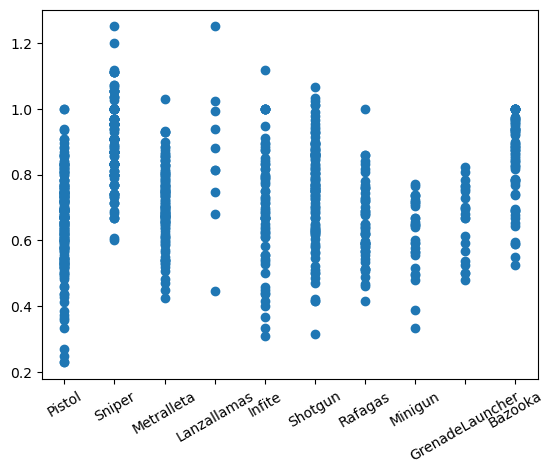

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

for ind in weaponsIDs:
    for j in range(0, len(weaponsIDs[ind])):
        if accuracyIDs[ind][j] > 0:
            y.append(accuracyIDs[ind][j])
            x.append(weaponsIDs[ind][j])
    
plt.scatter(x,y)
plt.xticks(rotation=30)
plt.show()

In [45]:
# Deberiamos separar por run
df_forms = pd.read_csv("TrazasHP_Forms_Febrero.csv", delimiter=';')
skills = df_forms[['Name','Value.Forms.Skill']].dropna()

skillsIDs = defaultdict(list)

for ind in skills.index:
    skillsIDs[skills['Name'][ind]].append(skills['Value.Forms.Skill'][ind])
    
for ind in skillsIDs:
    mean = 0
    for j in range(0,len(skillsIDs[ind])):
        mean += skillsIDs[ind][j]
        
    skillsIDs[ind] = mean/len(skillsIDs[ind])

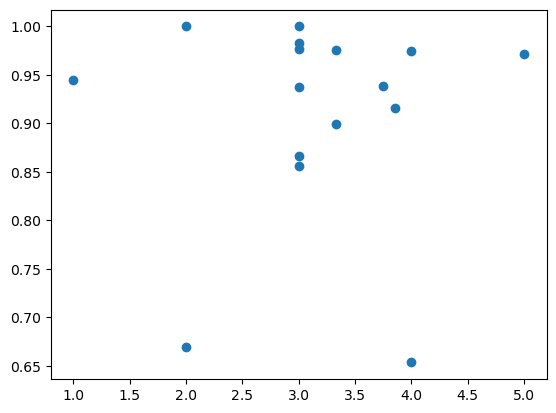

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

for ind in skillsIDs:
    x.append(skillsIDs[ind])
    y.append(accuracyIDs[str(ind)])
    
plt.scatter(x,y)
plt.show()